In [5]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

In [6]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Linearization - Simple pendulum

When dealing with system models, linearization is a process of modelling a nonlinear system with a linear differential equation in the neighbourhood of some operating point (typically an equilibrium point). In this notebook this process will be demonstrated using a simple pendulum. The force causing the oscillation motion of the pendulum (shown in the figure below) is defined as $-mgsin\theta$. The equation of motion for the pendulum is defined as:

\begin{equation}
    mL^2\frac{d^2\theta}{dt^2}=-mgsin\theta L.
\end{equation}

Upon rearrangement we get the following non-linear second-order differential equation:

\begin{equation}
    \frac{d^2\theta}{dt^2}+\frac{g}{L}sin\theta=0.
\end{equation}

In a case of small angular displacements, the small angle approximation (i.e. $sin\theta\approx\theta$) holds and the following linear second-order differential equation is obtained:

\begin{equation}
    \frac{d^2\theta}{dt^2}+\frac{g}{L}\theta=0.
\end{equation}

---

<table>
    <tr>
        <th style="text-align:center">Simple pendulum</th>
    </tr>
    <tr>
        <td style="width:300px; height:300px"><img src='img/pendulum.png'></td>
    </tr>
    <tr>
    </tr>    
</table>

### How to use this notebook?

Move the sliders to change the pendulum length $L$ and the values of the initial conditions $\theta_0$ and $\dot{\theta_0}$.

<IPython.core.display.Javascript object>


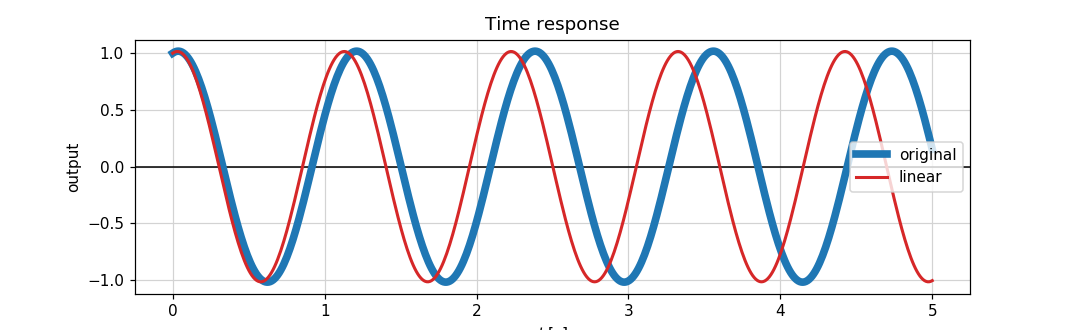

FloatSlider(value=0.3, continuous_update=False, description='$L$ [m]:', max=2.0, min=0.01, step=0.01)

FloatSlider(value=1.0, continuous_update=False, description='$\\theta_0$ [rad]:', max=3.0, min=-3.0)

FloatSlider(value=1.0, continuous_update=False, description='$\\dot \\theta_0$ [rad/s]:', max=3.0, min=-3.0)

Output()

In [7]:
# create figure
fig = plt.figure(figsize=(9.8, 3),num='Linearization - simple pendulum')

# add sublot
ax = fig.add_subplot(111)
ax.set_title('Time response')
ax.set_ylabel('output')
ax.set_xlabel('$t$ [s]')
ax.axhline(y=0, xmin=-1, xmax=6, color='k', linewidth=1)

ax.grid(which='both', axis='both', color='lightgray')

nonlinear, = ax.plot([], [])
linear, = ax.plot([], [])

style = {'description_width': 'initial'}

g=9.81 # m/s^2

def model_nonlinear(ic,t,L):
    fi, fidot = ic
    return [fidot,-g/L*np.sin(fi)]

def model_linear(ic,t,L):
    fi, fidot = ic
    return [fidot,-g/L*fi]

def build_model(y0,ypika0,L):
    ic=[y0,ypika0]
    t=np.linspace(0,5,num=500)
    fi=odeint(model_nonlinear,ic,t,args=(L,))
    ys=fi[:,0]

    fi_linear=odeint(model_linear,ic,t,args=(L,))
    ys_linear=fi_linear[:,0]
    
    global nonlinear, linear

    ax.lines.remove(nonlinear)
    ax.lines.remove(linear)
 
    nonlinear, = ax.plot(t,ys,label='original',color='C0', linewidth=5)
    linear, = ax.plot(t,ys_linear,label='linear',color='C3', linewidth=2)
    
    ax.legend()
    
    ax.relim()
    ax.autoscale_view()

L_slider=widgets.FloatSlider(value=0.3, min=.01, max=2., step=.01,
                                        description='$L$ [m]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)

ypika0_slider=widgets.FloatSlider(value=1, min=-3, max=3, step=0.1,
                                        description='$\dot \\theta_0$ [rad/s]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',) 

y0_slider=widgets.FloatSlider(value=1, min=-3, max=3, step=0.1,
                                        description='$\\theta_0$ [rad]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',) 

input_data=widgets.interactive_output(build_model, {'y0':y0_slider,'ypika0':ypika0_slider,'L':L_slider})

display(L_slider,y0_slider,ypika0_slider,input_data)